# 这是一个失败的模型...因为我选的自变量和因变量根本不相关...所以就不要看下去了

In [34]:
#导入第三方模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import statsmodels.api as sm

In [35]:
#导入数据
data_MJ = pd.read_excel('playoff.xls') 

In [36]:
data_MJ.rename(columns = {"得分":"score","篮板":"rebound","助攻":"assist","抢断":"steal","盖帽":"block"},inplace=True)

In [37]:
data_MJ.head(5)

,球员,赛季,轮次,果,比赛,时间,投篮,命中,出手,三分,...,出手.2,rebound,前场,后场,assist,steal,block,失误,犯规,score
0,迈克尔-乔丹,85-86,1,负,凯尔特122-104公牛,39,0.444,8,18,1.000,...,3,10,4,6,9,2,1,5,6,19
1,迈克尔-乔丹,85-86,1,负,凯尔特135-131公牛,53,0.537,22,41,NaN,...,21,5,1,4,6,3,2,4,4,63
2,迈克尔-乔丹,85-86,1,负,凯尔特123-104公牛,43,0.500,18,36,NaN,...,15,4,0,4,2,2,1,5,3,49
3,迈克尔-乔丹,86-87,1,负,凯尔特105-94公牛,39,0.300,9,30,0.000,...,14,11,6,5,7,2,1,2,4,30
4,迈克尔-乔丹,86-87,1,负,凯尔特105-96公牛,45,0.483,14,29,0.667,...,14,4,1,3,4,0,4,4,3,42


In [38]:
#将数据集拆分为训练集和测试集
train,test = model_selection.train_test_split(data_MJ,test_size = 0.2,random_state = 1234)

In [39]:
#根据train数据集建模
model = sm.formula.ols('score ~ rebound + assist + steal + block',data = train).fit()

In [40]:
print(f"模型的偏回归系数分别为:\n{model.params}")

模型的偏回归系数分别为:
Intercept    32.633881
rebound       0.019032
assist       -0.224708
steal         0.492056
block         1.609537
dtype: float64


In [41]:
data_MJ.head(2)

,球员,赛季,轮次,果,比赛,时间,投篮,命中,出手,三分,...,出手.2,rebound,前场,后场,assist,steal,block,失误,犯规,score
0,迈克尔-乔丹,85-86,1,负,凯尔特122-104公牛,39,0.444,8,18,1.0,...,3,10,4,6,9,2,1,5,6,19
1,迈克尔-乔丹,85-86,1,负,凯尔特135-131公牛,53,0.537,22,41,NaN,...,21,5,1,4,6,3,2,4,4,63


In [44]:
#删除test数据集中‘得分’变量，用剩下自变量进行预测
test_x = test.drop(labels ='score',axis=1)
pred = model.predict(exog=test_x)
print("对比预测值和实际值的差异:\n",pd.DataFrame({'预测值':pred,'实际值':test.score}))

对比预测值和实际值的差异:
            预测值  实际值
54   34.699608   29
58   33.032080   38
25   35.458870   40
172  34.629536   38
138  35.053861   26
102  32.364908   18
74   32.856964   35
134  34.362188   35
101  32.608648   32
149  33.199690   27
29   33.268315   50
31   31.466076   30
155  33.287347   28
137  31.811179   22
135  34.046000   39
88   31.705242   33
39   33.119737   34
99   33.516630   27
125  34.958557   35
105  39.763560   29
162  33.969870   29
110  33.477814   40
51   35.970100   29
6    31.972590   25
63   35.679896   33
40   35.569383   37
136  34.729274   38
111  40.499356   38
160  31.007510   28
59   31.981740   25
9    34.720123   36
61   32.865363   29
27   31.111823   34
57   32.818899   22
150  38.291826   34


In [45]:
#根据上面可以大概写个模型
#score = 32.63 + 0.02rebound - 0.22 assist + 0.49 steal + 1.6 block

In [46]:
#做个F检验

In [47]:
#导入spicy模块
from scipy.stats import f
#统计变量个数和观测个数
p = model.df_model
n = train.shape[0]
F_Theory = f.ppf(q=0.95,dfn=p,dfd=n-p-1)
print(f'F分布理论值为:{F_Theory}')
print(f'F分布实际值为:{model.fvalue}')

F分布理论值为:2.438739218445942
F分布实际值为:1.3647404708638335


怎么会没通过F检验呢....

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.365
Date:                Sat, 07 May 2022   Prob (F-statistic):              0.249
Time:                        13:03:40   Log-Likelihood:                -508.81
No. Observations:                 140   AIC:                             1028.
Df Residuals:                     135   BIC:                             1042.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.6339      2.666     12.240      0.000      27.361      37.907
rebound        0.0190      0.317      0.060      0.952      -0.607       0.645
assist        -0.2247      0.274     -0.819      0.414      -0.767       0.318
steal          0.4921      0.561      0.877      0.382      -0.617       1.602
block          1.6095      0.782      2.059      0.041       0.063       3.156
==============================================================================
Omnibus:                        4.119   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.174
Skew:                           0.409   Prob(JB):                        0.124
Kurtosis:                       2.787   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#做个正态性检验看一下

D:\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


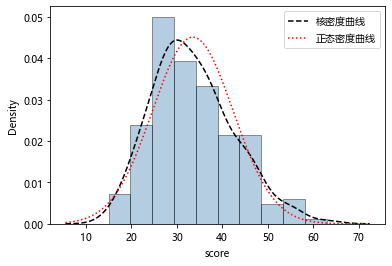

In [57]:
import scipy.stats as stats
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']  = False
sns.distplot(
    a = data_MJ.score,bins = 10, fit = stats.norm,
    norm_hist = True,hist_kws = {'color':'steelblue','edgecolor':'black'},
    kde_kws = {'color':'black','linestyle':'--','label':'核密度曲线'},
    fit_kws = {'color':'red','linestyle':':','label':'正态密度曲线'}
)
plt.legend()
plt.show()

做一下多重共线性检验...

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#自变量X
X = sm.add_constant(data_MJ.loc[:,['assist','rebound','steal','block']])

#构造空数据框储存VIF值
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF 值'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,features,VIF 值
0,const,10.621620
1,assist,1.052902
2,rebound,1.028803
3,steal,1.034049
4,block,1.015604


好像没有多重共线性...我看看线性相关性是不是比较低

In [61]:
data_MJ.drop('score',axis=1).corrwith(data_MJ.score)

轮次        -0.167850
时间         0.365200
投篮         0.549034
命中         0.882151
出手         0.711870
三分         0.175508
命中.1       0.168006
出手.1       0.064763
罚球         0.215233
命中.2       0.451646
出手.2       0.419938
rebound    0.027369
前场        -0.041171
后场         0.058263
assist    -0.068094
steal      0.087523
block      0.167802
失误         0.024418
犯规         0.190890
dtype: float64

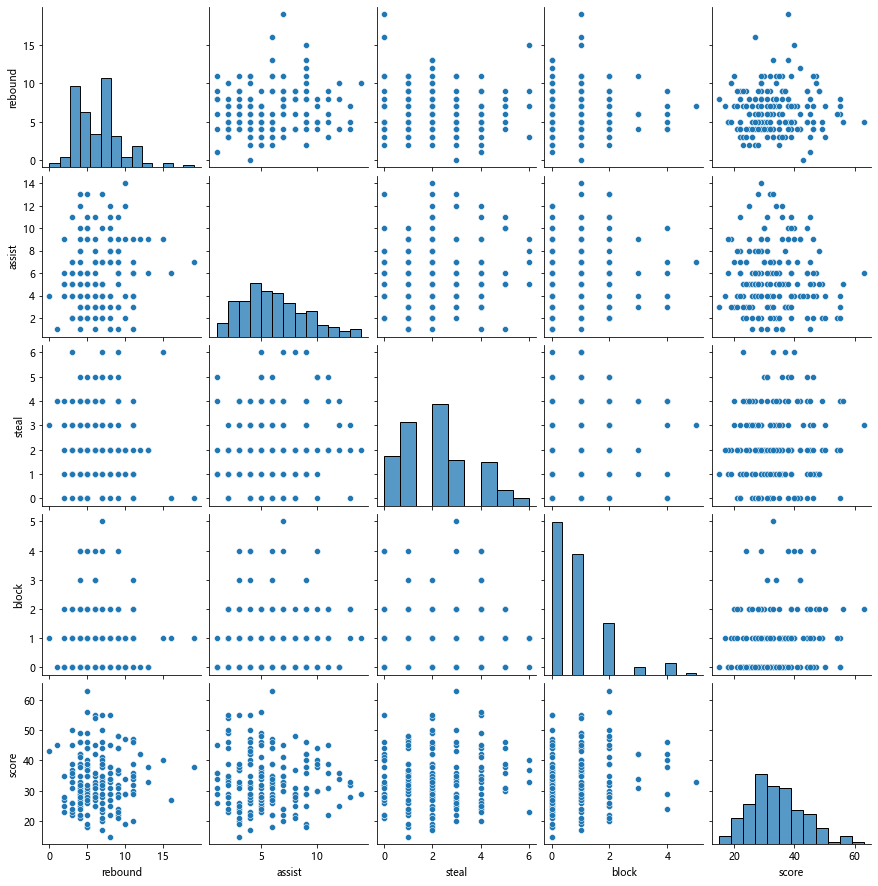

In [62]:
#导入模块
import matplotlib.pyplot as plt
import seaborn

#绘制散点图矩阵
seaborn.pairplot(data_MJ.loc[:,['rebound','assist','steal','block','score']])

plt.show()